In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functools import partial
from pyprojroot import here
from scipy.stats import bootstrap

%matplotlib inline

In [2]:
df = pd.read_csv(here('data/aita_processed_gpt.csv'))

In [3]:
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO']
n_labels = len(labels)

In [36]:
# Calculate bootstrap estimates
def categorical_proportion(data, category):
    return np.mean(data == category)

In [37]:
observed_bounds = [
    bootstrap((df['true_label'].values,), partial(categorical_proportion, category=label))
    for label in labels]

In [38]:
gpt_bounds = [
    bootstrap((df['gpt_label'].values,), partial(categorical_proportion, category=label))
    for label in labels]

[Text(0, 0, 'NTA'),
 Text(1, 0, 'YTA'),
 Text(2, 0, 'NAH'),
 Text(3, 0, 'ESH'),
 Text(4, 0, 'INFO')]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

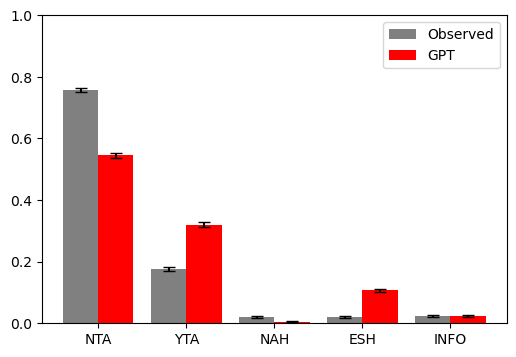

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

observed_counts = df['true_label'].value_counts(normalize=True)
gpt_counts = df['gpt_label'].value_counts(normalize=True)

width = 0.4

ax.bar(x=np.arange(n_labels) - width / 2,
       height=[observed_counts[label] for label in labels],
       width=width,
       yerr=[[observed_bounds[ii].confidence_interval.high - observed_counts[labels[ii]]
              for ii in range(n_labels)],
             [observed_counts[labels[ii]] - observed_bounds[ii].confidence_interval.low
              for ii in range(n_labels)]],
       error_kw={'capsize': 4},
       color='gray',
       label='Observed')
ax.bar(x=np.arange(n_labels) + width / 2,
       height=[gpt_counts[label] for label in labels],
       width=width,
       yerr=[[gpt_bounds[ii].confidence_interval.high - gpt_counts[labels[ii]]
              for ii in range(n_labels)],
             [gpt_counts[labels[ii]] - gpt_bounds[ii].confidence_interval.low
              for ii in range(n_labels)]],
       error_kw={'capsize': 4},
       color='red',
       label='GPT')

ax.set_ylim([0, 1])
ax.legend(loc=0, prop={'size': 10})
ax.set_xticks(np.arange(n_labels))
ax.set_xticklabels(['NTA', 'YTA', 'NAH', 'ESH', 'INFO'])

In [8]:
ct = pd.crosstab(df['true_label'], df['gpt_label']).reindex(labels)[labels]

Text(50.722222222222214, 0.5, 'Observed Label')

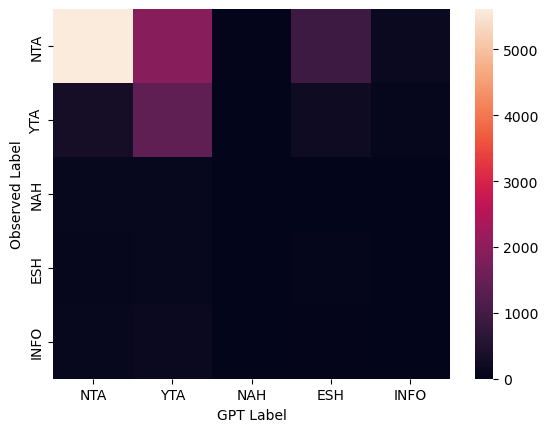

In [12]:
ax = sns.heatmap(ct)
ax.set_xlabel('GPT Label')
ax.set_ylabel('Observed Label')

In [23]:
ct_normed = pd.crosstab(df['true_label'], df['gpt_label'], normalize='index').reindex(labels)[labels]

Text(50.722222222222214, 0.5, 'Observed Label')

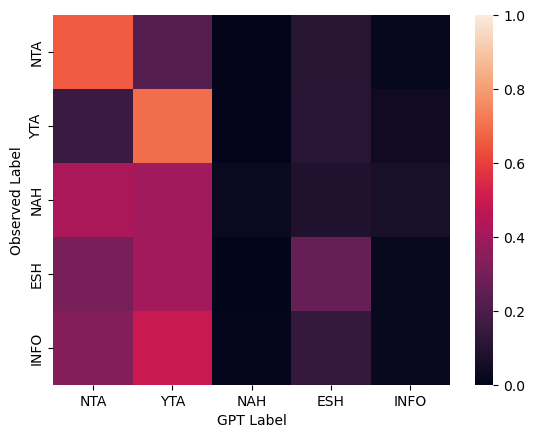

In [25]:
ax = sns.heatmap(ct, vmin=0, vmax=1)
ax.set_xlabel('GPT Label')
ax.set_ylabel('Observed Label')

In [26]:
ct_normed

gpt_label,NTA,YTA,NAH,ESH,INFO
true_label,,,,,
NTA,0.652558,0.222907,0.004186,0.102209,0.018140
YTA,0.156110,0.692768,0.003990,0.105736,0.041397
NAH,0.424370,0.399160,0.029412,0.084034,0.063025
ESH,0.306383,0.408511,0.000000,0.263830,0.021277
INFO,0.335740,0.494585,0.010830,0.137184,0.021661


In [20]:
5612 / 8600

0.6525581395348837

In [28]:
ct_normed = pd.crosstab(df['true_label'], df['gpt_label'], normalize='columns').reindex(labels)[labels]

In [29]:
ct_normed

gpt_label,NTA,YTA,NAH,ESH,INFO
true_label,,,,,
NTA,0.906477,0.527518,0.666667,0.725846,0.588679
YTA,0.050557,0.382223,0.148148,0.175062,0.313208
NAH,0.016314,0.026142,0.129630,0.016515,0.056604
ESH,0.011630,0.026417,0.000000,0.051197,0.018868
INFO,0.015022,0.037700,0.055556,0.031379,0.022642


In [30]:
ct

gpt_label,NTA,YTA,NAH,ESH,INFO
true_label,,,,,
NTA,0.652558,0.222907,0.004186,0.102209,0.018140
YTA,0.156110,0.692768,0.003990,0.105736,0.041397
NAH,0.424370,0.399160,0.029412,0.084034,0.063025
ESH,0.306383,0.408511,0.000000,0.263830,0.021277
INFO,0.335740,0.494585,0.010830,0.137184,0.021661


In [31]:
pd.crosstab(df['true_label'], df['gpt_label']).reindex(labels)[labels]

gpt_label,NTA,YTA,NAH,ESH,INFO
true_label,,,,,
NTA,5612,1917,36,879,156
YTA,313,1389,8,212,83
NAH,101,95,7,20,15
ESH,72,96,0,62,5
INFO,93,137,3,38,6
